In [ ]:
from PIL import Image
image=Image.open('/content/insta.jpg')

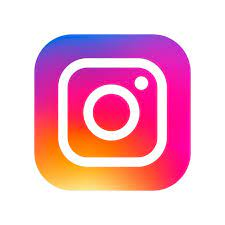

In [ ]:
image

In [ ]:
from scipy.ndimage import median_filter
from skimage import io,img_as_ubyte
image=io.imread('/content/insta.jpg')
denoised_image=median_filter(image,size=3)

# Supervised Learning
**Simple linear regression With Clean Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data=pd.read_csv('/content/delivery_time.csv')

In [ ]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
data.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [ ]:
data.rename(columns={'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},inplace=True)

In [ ]:
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
data.mean()

Delivery_Time    16.790952
Sorting_Time      6.190476
dtype: float64

In [ ]:
data.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [ ]:
data.median()

Delivery_Time    17.83
Sorting_Time      6.00
dtype: float64

In [ ]:
data.mode()

,Delivery_Time,Sorting_Time
0,8.00,7.0
1,9.50,NaN
2,10.75,NaN
3,11.50,NaN
4,12.03,NaN
5,13.50,NaN
6,13.75,NaN
7,14.88,NaN
8,15.35,NaN
9,16.68,NaN


In [ ]:
data.std()

Delivery_Time    5.074901
Sorting_Time     2.542028
dtype: float64

In [ ]:
data.var()

Delivery_Time    25.754619
Sorting_Time      6.461905
dtype: float64

In [ ]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [ ]:
data.cov()

,Delivery_Time,Sorting_Time
Delivery_Time,25.754619,10.655810
Sorting_Time,10.655810,6.461905


**data.corr() calculates the correlation matrix of the DataFrame.

sns.heatmap creates a heatmap using Seaborn.

annot=True adds numerical annotations to each cell.

cmap='coolwarm' sets the color map.

fmt='.2f' formats the annotations as floating-point numbers with two decimal places.**

Text(0.5, 1.0, 'Correlation Heatmap')

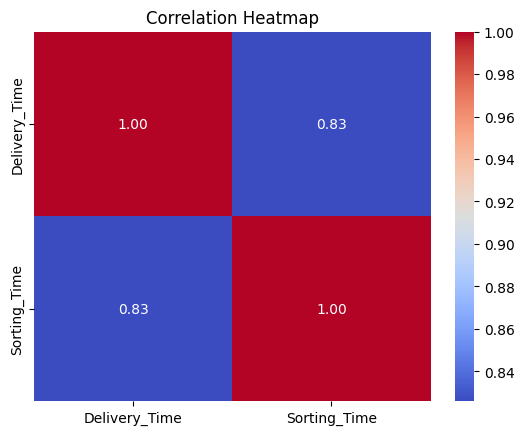

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Covariance Heatmap')

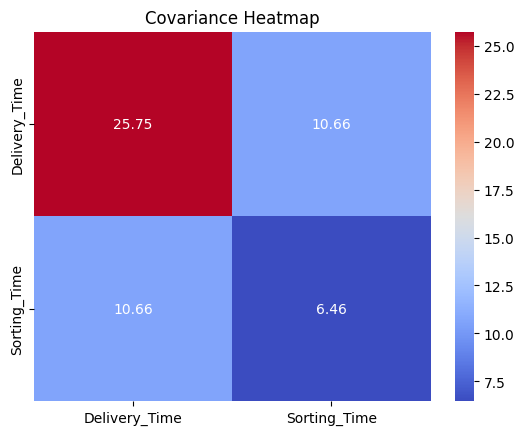

In [ ]:
sns.heatmap(data.cov(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Covariance Heatmap')


In [ ]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [ ]:
x

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.50)

In [ ]:
x_train

array([[17.83],
       [18.75],
       [ 8.  ],
       [19.83],
       [21.5 ],
       [12.03],
       [15.35],
       [14.88],
       [ 9.5 ],
       [18.11]])

In [ ]:
y_train

array([7, 9, 2, 8, 5, 3, 6, 4, 3, 7])

In [ ]:
x_test

array([[24.  ],
       [11.5 ],
       [13.5 ],
       [29.  ],
       [17.9 ],
       [19.75],
       [10.75],
       [21.  ],
       [13.75],
       [19.  ],
       [16.68]])

In [ ]:
y_test

array([ 9,  3,  4, 10, 10,  6,  4, 10,  6,  7,  7])

In [ ]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()

In [ ]:
le.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=le.predict(x_test)

In [ ]:
y_pred

array([ 8.98108452,  3.66601013,  4.51642203, 11.10711427,  6.38732822,
        7.17395923,  3.34710567,  7.70546666,  4.62272352,  6.85505476,
        5.86857696])

# **Logistic Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data=pd.read_csv('/content/claimants.csv')

FileNotFoundError: ignored

In [ ]:
data

In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
data.isnull().sum()

In [ ]:
data.drop(["CASENUM"],inplace=True,axis = 1)

In [ ]:
data.dropna(axis=0,inplace=True)#row

In [ ]:
data.isnull().sum()

In [ ]:
data.mean()

In [ ]:
data.median()

In [ ]:
data.mode()

In [ ]:
data.corr()

In [ ]:
data.var()

In [ ]:
sns.heatmap(data.cov(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Covariance Heatmap')


In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap')


In [ ]:
print(data.columns)
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.50)


In [ ]:
from sklearn.linear_model import LogisticRegression
le=LogisticRegression()

In [ ]:
le.fit(x_train,y_train)

In [ ]:
y_pred=le.predict(x_test)

In [ ]:
y_pred

**confusion matrix**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat

**Accuracy**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

**Classification report**

In [ ]:
classification_report_result = classification_report(y_test, y_pred)
classification_report_result

In [ ]:
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Decision_Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data=pd.read_csv('/content/decison_datset (1).csv')
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,male,35.0,1,0,53.1000,C,0
4,2,male,28.0,0,0,13.0000,S,1
5,2,female,32.0,0,2,26.0000,S,1
6,1,male,45.0,1,0,83.4750,S,0
7,3,male,24.0,0,0,7.8958,S,1
8,1,female,29.0,0,0,211.3375,S,1
9,3,female,19.0,0,0,30.0000,C,1


In [ ]:
data.isnull().sum()

Pclass      0
Sex         0
Age         2
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [ ]:
data.dropna(axis=0,inplace=True)#row

In [ ]:
data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

<ipython-input-6-ef60c8c94a8c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


Text(0.5, 1.0, 'Correlation Heatmap')

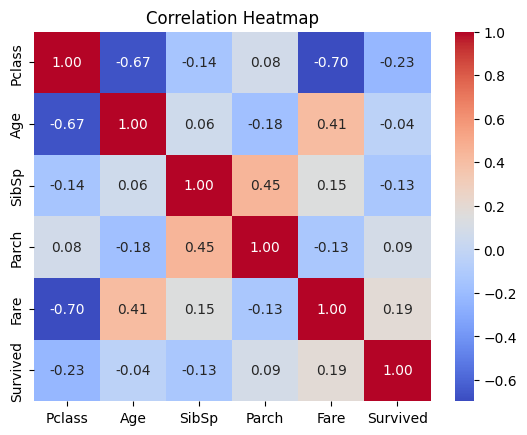

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap')


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(
    data['Embarked'])


In [ ]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,1,1,35.0,1,0,53.1000,0,0
4,2,1,28.0,0,0,13.0000,2,1
5,2,0,32.0,0,2,26.0000,2,1
6,1,1,45.0,1,0,83.4750,2,0
7,3,1,24.0,0,0,7.8958,2,1
8,1,0,29.0,0,0,211.3375,2,1
9,3,0,19.0,0,0,30.0000,0,1


In [ ]:
y = data['Survived']
columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
x = data[columns]


In [ ]:
x.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
y

0     0
1     1
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    1
14    1
15    0
16    1
17    0
18    1
19    0
20    1
21    0
22    1
23    1
24    0
25    1
26    1
27    0
28    1
29    0
30    1
31    0
32    1
34    1
35    0
36    1
37    1
38    0
39    1
40    0
41    1
42    0
43    1
44    0
45    1
46    1
47    0
48    1
Name: Survived, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat

array([[2, 0],
       [1, 7]])

[Text(0.4230769230769231, 0.9166666666666666, 'x[5] <= 7.823\ngini = 0.497\nsamples = 37\nvalue = [17, 20]'),
 Text(0.34615384615384615, 0.75, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.5, 0.75, 'x[2] <= 32.5\ngini = 0.478\nsamples = 33\nvalue = [13, 20]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[3] <= 0.5\ngini = 0.363\nsamples = 21\nvalue = [5, 16]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[2] <= 29.5\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.23076923076923078, 0.25, 'x[0] <= 2.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.15384615384615385, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3076923076923077, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[0] <= 2.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\

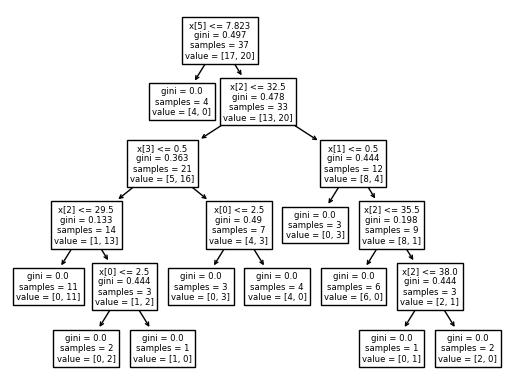

In [ ]:
from sklearn import tree
tree.plot_tree(clf)

In [ ]:
import pickle

In [ ]:
filename = "my_model.pickle"

In [ ]:
pickle.dump(clf, open(filename, "wb"))

In [ ]:
loaded_model = pickle.load(open(filename, "rb"))

In [ ]:
data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Survived'],
      dtype='object')

In [ ]:
data.min()

Pclass       1.00
Sex          0.00
Age         18.00
SibSp        0.00
Parch        0.00
Fare         7.25
Embarked     0.00
Survived     0.00
dtype: float64

In [ ]:
data.max()

Pclass        3.0000
Sex           1.0000
Age          54.0000
SibSp         2.0000
Parch         3.0000
Fare        211.3375
Embarked      2.0000
Survived      1.0000
dtype: float64

In [ ]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [ ]:
import pickle
import streamlit as st

In [ ]:
with open('Model.py', 'wb') as f:
    pickle.dump(clf, f)

In [ ]:
import numpy as np
import pickle
import streamlit as st
import pandas as pd

# Load the pre-trained model
loaded_model = pickle.load(open('/content/Model.py', 'rb'))

def survival_prediction(input_data):
    # Changing the input_data to a numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # Reshape the array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

    prediction = loaded_model.predict(input_data_reshaped)

    if prediction[0] == 0:
        return 'Not Survived'
    else:
        return 'Survived'

def main():
    # Giving a title
    st.title('Titanic Survival Prediction')

    # Getting the input data from the user as numbers
    pclass = st.slider('Pclass', 1, 3, 2)
    age = st.slider('Age', 0, 100, 30)
    sibsp = st.slider('SibSp', 0, 8, 1)
    parch = st.slider('Parch', 0, 6, 0)
    fare = st.slider('Fare', 0, 300, 50)
    sex_male = st.radio('Sex (Male)', [0, 1])
    embarked_q = st.radio('Embarked (Queenstown)', [0, 1])
    embarked_s = st.radio('Embarked (Southampton)', [0, 1])

    # Code for Prediction
    prediction_result = ''

    # Creating a button for Prediction
    if st.button('Predict Survival'):
        prediction_result = survival_prediction([pclass, age, sibsp, parch, fare, sex_male, embarked_q, embarked_s])

    st.success(prediction_result)

if __name__ == '__main__':
    main()

In [ ]:
!wget -q -O - ipv4.icanhazip.com

104.197.109.200


In [ ]:
!streamlit run main.py & npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session 9f64f879a96b5c9


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://104.197.109.200:8501

npx: installed 22 in 3.133s
your url is: https://tasty-women-think.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
2023-12-27 04:23:44.869 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 534, in _run_script
    exec(code, module.__dict__)
  File "/content/main.py", line 47, in <module>
    main()
  File "/content/main.py", line 42, in main
    prediction_result = survival_prediction([pclass, age, sibsp, parch, fare, sex_male, embarked_q, embarked_s])
  File "/content/main.py", line 16, in survival_prediction
    pr

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.read_csv('/content/sample.csv')

In [ ]:
data

,age,qualification,experience,working,salary
0,25,B.Tech,3,2,3000
1,27,M.Tech,2,1,5000
2,30,M.tech,5,3,5000
3,40,M.tech,6,3,5000
4,25,B.Tech,2,1,3000
5,22,B.Tech,1,1,3000
6,40,Phd,9,9,10000


In [ ]:
data.columns

Index(['age', 'qualification', 'experience', 'working', 'salary'], dtype='object')

In [ ]:
data.isnull().sum()

age              0
qualification    0
experience       0
working          0
salary           0
dtype: int64

In [ ]:
data.corr()

<ipython-input-116-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,experience,working,salary
age,1.000000,0.923787,0.771192,0.787065
experience,0.923787,1.000000,0.929240,0.879671
working,0.771192,0.929240,1.000000,0.939250
salary,0.787065,0.879671,0.939250,1.000000


<ipython-input-117-ef60c8c94a8c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


Text(0.5, 1.0, 'Correlation Heatmap')

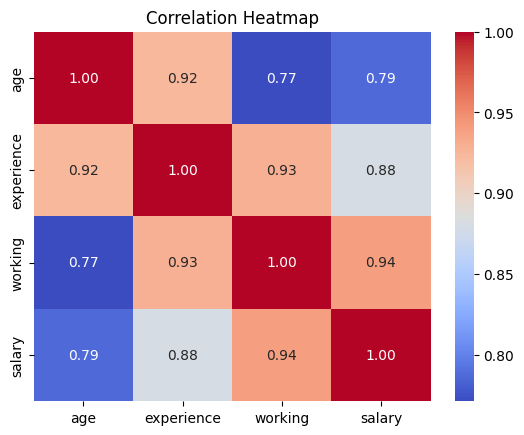

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap')


In [ ]:
data.columns

Index(['age', 'qualification', 'experience', 'working', 'salary'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Example usage
le = LabelEncoder()
data['qualification']=le.fit_transform(data['qualification'])

In [ ]:
y = data['salary']
columns = ['age', 'qualification', 'experience', 'working']
x = data[columns]


In [ ]:
x

,age,qualification,experience,working
0,25,0,3,2
1,27,1,2,1
2,30,2,5,3
3,40,2,6,3
4,25,0,2,1
5,22,0,1,1
6,40,3,9,9


In [ ]:
y

0     3000
1     5000
2     5000
3     5000
4     3000
5     3000
6    10000
Name: salary, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5


[Text(0.4, 0.8333333333333334, 'x[2] <= 3.5\ngini = 0.64\nsamples = 5\nvalue = [2, 2, 1]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.6, 0.5, 'x[1] <= 2.5\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]')]

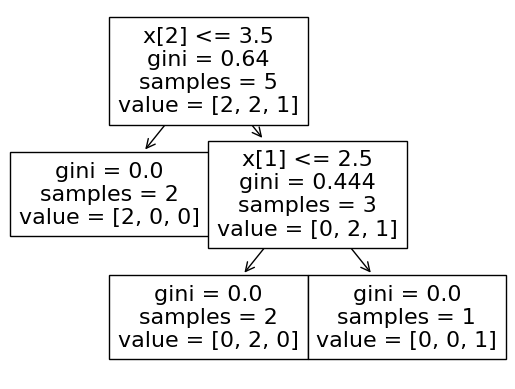

In [ ]:
from sklearn import tree
tree.plot_tree(clf)

#Randomforest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving decison_datset.csv to decison_datset (3).csv


In [ ]:
data=pd.read_csv('/content/decison_datset (2).csv')

In [ ]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,male,35.0,1,0,53.1000,C,0
4,2,male,28.0,0,0,13.0000,S,1
5,2,female,32.0,0,2,26.0000,S,1
6,1,male,45.0,1,0,83.4750,S,0
7,3,male,24.0,0,0,7.8958,S,1
8,1,female,29.0,0,0,211.3375,S,1
9,3,female,19.0,0,0,30.0000,C,1


In [ ]:
data.isnull().sum()

Pclass      0
Sex         0
Age         2
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [ ]:
data.fillna(data.mean(),inplace=True)

<ipython-input-173-d85acd3950fb>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(),inplace=True)


In [ ]:
data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [ ]:
data.mean()

<ipython-input-175-abc01cf6c622>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


Pclass       2.163265
Age         29.170213
SibSp        0.387755
Parch        0.428571
Fare        31.357737
Survived     0.571429
dtype: float64

In [ ]:
data.corr()

<ipython-input-176-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Pclass,Age,SibSp,Parch,Fare,Survived
Pclass,1.000000,-0.653450,-0.129519,0.101113,-0.698522,-0.265509
Age,-0.653450,1.000000,0.063478,-0.170472,0.412507,-0.037894
SibSp,-0.129519,0.063478,1.000000,0.470934,0.147857,-0.135593
Parch,0.101113,-0.170472,0.470934,1.000000,-0.126236,0.049507
Fare,-0.698522,0.412507,0.147857,-0.126236,1.000000,0.202247
Survived,-0.265509,-0.037894,-0.135593,0.049507,0.202247,1.000000


In [ ]:
data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Survived'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(
    data['Embarked'])


In [ ]:
y = data['Survived']
columns = [ 'Sex', 'Age', 'Parch', 'Fare', 'Embarked']
x = data[columns]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
rf=RandomForestClassifier(n_estimators=3, random_state=42)

In [ ]:
rf.fit(x_train,y_train)#Training

RandomForestClassifier(n_estimators=3, random_state=42)

In [ ]:
y_pred=rf.predict(x_test)

**Accuracy**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8


**Confusion Matrix**

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat

array([[5, 2],
       [0, 3]])

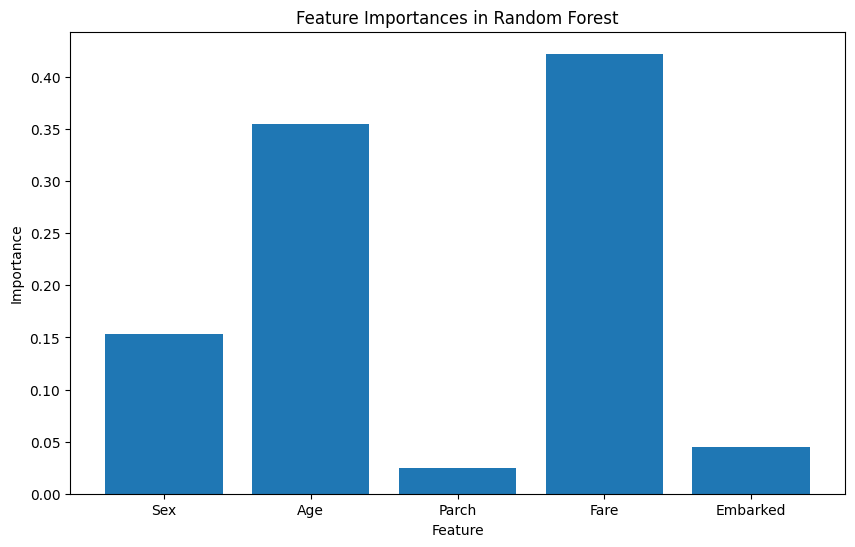

In [ ]:
# Get feature importances from the trained Random Forest
feature_importances = rf.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(x.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest')
plt.show()


# KNN CLASSIFICATION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving pima-indians-diabetes.data.csv to pima-indians-diabetes.data.csv


In [ ]:
data=pd.read_csv('/content/pima-indians-diabetes.data.csv')

In [ ]:
data

,Glucose_Level,Blood_Pressure,Insulin_Level,BMI,Age,Diabetes_Pedigree_Function,Skin_Thickness,Pregnancy_Count,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.isnull().sum()

Glucose_Level                 0
Blood_Pressure                0
Insulin_Level                 0
BMI                           0
Age                           0
Diabetes_Pedigree_Function    0
Skin_Thickness                0
Pregnancy_Count               0
Outcome                       0
dtype: int64

In [ ]:
data.corr()

,Glucose_Level,Blood_Pressure,Insulin_Level,BMI,Age,Diabetes_Pedigree_Function,Skin_Thickness,Pregnancy_Count,Outcome
Glucose_Level,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
Blood_Pressure,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
Insulin_Level,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
BMI,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
Age,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
Diabetes_Pedigree_Function,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
Skin_Thickness,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
Pregnancy_Count,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
Outcome,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

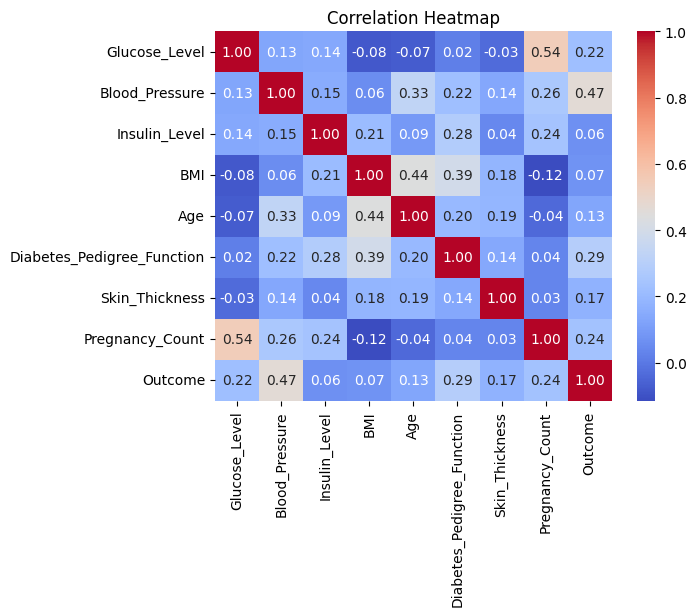

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap')


In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Create KNN classifier with, for example, K=3
knn= KNeighborsClassifier(n_neighbors=3)


In [ ]:
# Train the classifier
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7207792207792207

In [ ]:
precision=precision_score(y_test,y_pred)
precision

0.6206896551724138

**Deployment**

In [ ]:
# Import necessary libraries
from flask import Flask, request, jsonify
import joblib

# Create a Flask web application
app = Flask(__name__)

# Load the trained machine learning model (replace 'your_model.pkl' with your actual model file)
model = joblib.load('your_model.pkl')

# Define an endpoint for making predictions
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get input data from the request
        data = request.get_json(force=True)

        # Assuming your model expects features named 'feature1', 'feature2', etc.
        features = [data['feature1'], data['feature2'], data['feature3']]

        # Make a prediction using the loaded model
        prediction = model.predict([features])[0]

        # Return the prediction as JSON
        return jsonify({'prediction': prediction})

    except Exception as e:
        return jsonify({'error': str(e)})

# Run the Flask app
if __name__ == '__main__':
    app.run(port=5000)


FileNotFoundError: ignored